## Librairies

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Importation des donnees

In [2]:
data = pd.read_csv("weight-height-bmi.csv")
data

,Genre,Taille,Poids,BMI
0,Male,1.875714,109.720985,Obesity
1,Male,1.747060,73.622732,Normal
2,Male,1.882397,96.497550,Overweight
3,Male,1.821967,99.809504,Obesity
4,Male,1.774998,93.598619,Overweight
...,...,...,...,...
9995,Female,1.680785,62.041159,Normal
9996,Female,1.703506,77.504315,Overweight
9997,Female,1.622247,58.275377,Normal
9998,Female,1.753470,74.322166,Normal


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Genre   10000 non-null  object 
 1   Taille  10000 non-null  float64
 2   Poids   10000 non-null  float64
 3   BMI     10000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [4]:
data.isnull().sum()

Genre     0
Taille    0
Poids     0
BMI       0
dtype: int64

In [5]:
data.describe()

,Taille,Poids
count,10000.000000,10000.000000
mean,1.685736,73.228054
std,0.097727,14.564131
min,1.378284,29.347460
25%,1.613043,61.605982
50%,1.684479,73.124894
75%,1.757026,84.898599
max,2.006568,122.465167


C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


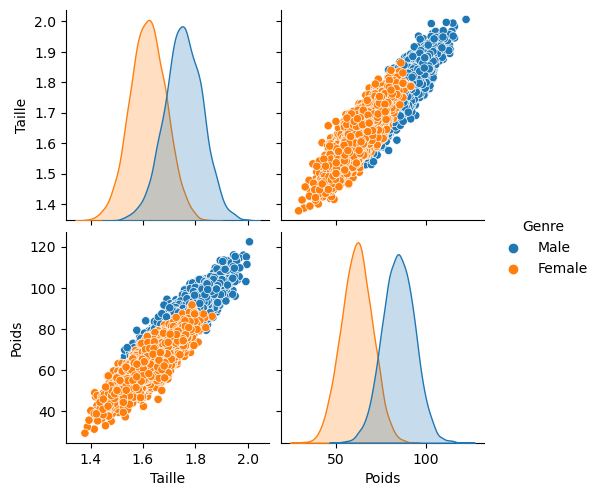

In [6]:
sns.pairplot(data, hue='Genre')

<Axes: >

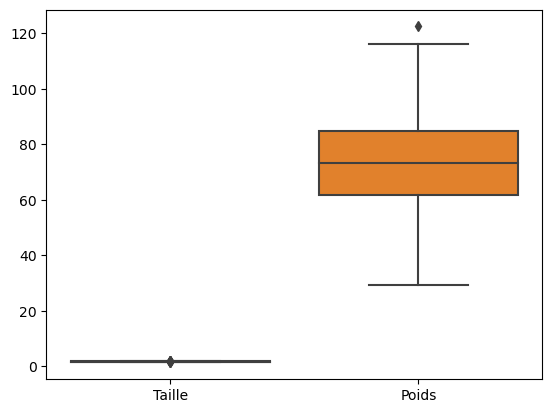

In [7]:
sns.boxplot(data)

## Separation des donnees en categorielle et numerique

In [8]:
cat_data=[]
num_data=[]
for i,c in enumerate (data.dtypes):
    if c == object:
        cat_data.append(data.iloc[:,i])
    else:
        num_data.append(data.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

## Traitement des valeurs manquantes

In [9]:
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

num_data.fillna(method = 'bfill', inplace = True)

In [10]:
num_data

,Taille,Poids
0,1.875714,109.720985
1,1.747060,73.622732
2,1.882397,96.497550
3,1.821967,99.809504
4,1.774998,93.598619
...,...,...
9995,1.680785,62.041159
9996,1.703506,77.504315
9997,1.622247,58.275377
9998,1.753470,74.322166


## Recodage des variables qualitatives

In [11]:
le=LabelEncoder()

for i in cat_data:
    cat_data[i]=le.fit_transform(cat_data[i])

In [12]:
cat_data

,Genre,BMI
0,1,1
1,1,0
2,1,2
3,1,1
4,1,2
...,...,...
9995,0,0
9996,0,2
9997,0,0
9998,0,0


,Genre
0,1
1,1
2,1
3,1
4,1
...,...
9995,0
9996,0
9997,0
9998,0


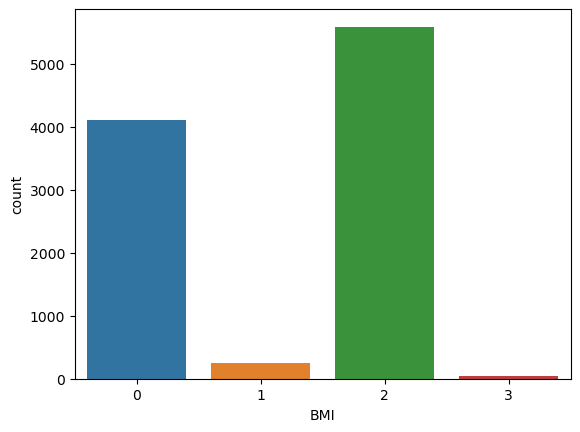

In [13]:
target=cat_data['BMI']
cat_data.drop('BMI', axis=1,inplace=True)

sns.countplot(x=target)
cat_data

## Concatener les variables numerique et categorielle

In [14]:
X = pd.concat([cat_data,num_data], axis=1)
y=target
X

,Genre,Taille,Poids
0,1,1.875714,109.720985
1,1,1.747060,73.622732
2,1,1.882397,96.497550
3,1,1.821967,99.809504
4,1,1.774998,93.598619
...,...,...,...
9995,0,1.680785,62.041159
9996,0,1.703506,77.504315
9997,0,1.622247,58.275377
9998,0,1.753470,74.322166


# Analyse exploratoire

Le pourcentage de personne Normale est : 41.14
Le pourcentage de personne Obese est : 2.55
Le pourcentage de personne en Surpoids est : 55.88999999999999
Le pourcentage de personne en Souspoids est : 0.42


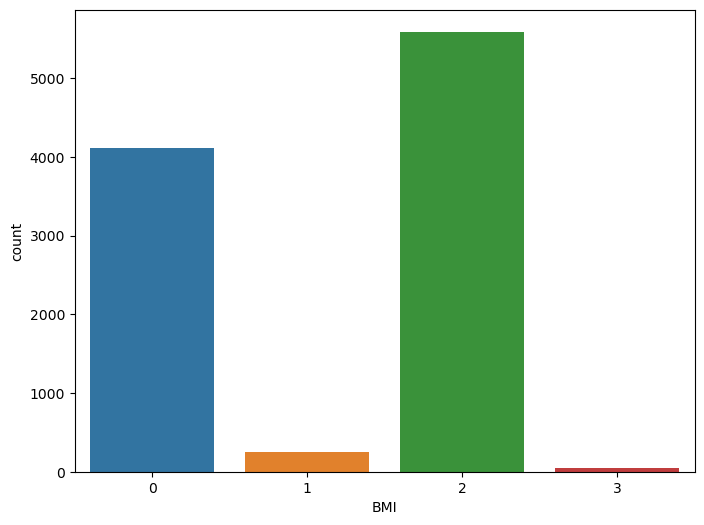

In [15]:
target.value_counts()
plt.figure(figsize=(8,6))
sns.countplot(x=target)
normal=(target.value_counts()[0]/len(target))*100
obesity=(target.value_counts()[1]/len(target))*100
overweight=(target.value_counts()[2]/len(target))*100
underweight=(target.value_counts()[3]/len(target))*100

print(f'Le pourcentage de personne Normale est : {normal}')
print(f'Le pourcentage de personne Obese est : {obesity}')
print(f'Le pourcentage de personne en Surpoids est : {overweight}')
print(f'Le pourcentage de personne en Souspoids est : {underweight}')

In [16]:
df=pd.concat([cat_data, num_data, target], axis=1) #La base de données néttoyée
df

,Genre,Taille,Poids,BMI
0,1,1.875714,109.720985,1
1,1,1.747060,73.622732,0
2,1,1.882397,96.497550,2
3,1,1.821967,99.809504,1
4,1,1.774998,93.598619,2
...,...,...,...,...
9995,0,1.680785,62.041159,0
9996,0,1.703506,77.504315,2
9997,0,1.622247,58.275377,0
9998,0,1.753470,74.322166,0


## Relation entre les variables

C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


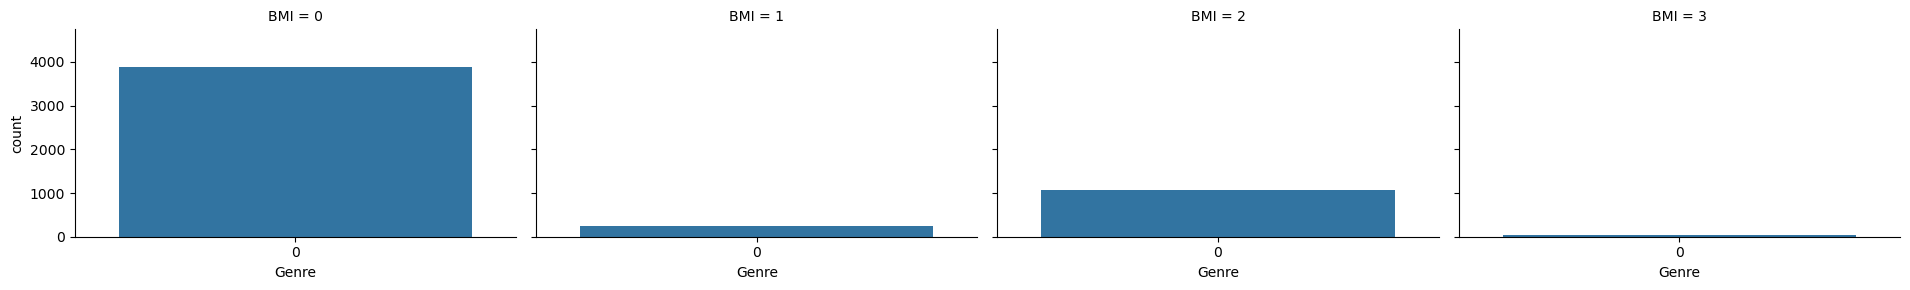

In [17]:
rel1=sns.FacetGrid(df, col='BMI',aspect=1.6)
rel1.map(sns.countplot, 'Genre')

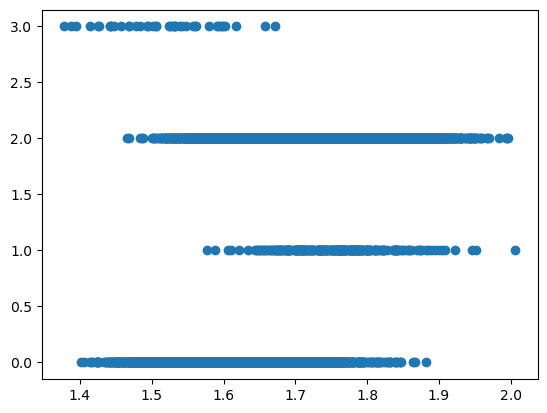

In [18]:
plt.scatter(df['Taille'],df['BMI'])

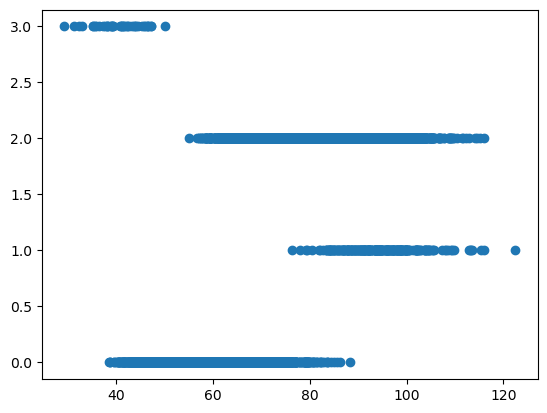

In [19]:
plt.scatter(df['Poids'],df['BMI'])

In [23]:
# Appliquer la standardisation
scaler = StandardScaler()
df = scaler.fit_transform(df)

# Preparation du model

## Division de la base en donnees d'entrainement et de test

In [24]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
print('X_train taille: ', X_train.shape)
print('X_test taille: ',X_test.shape)
print('y_train taille: ',y_train.shape)
print('X_test taille: ',y_test.shape)

X_train taille:  (8000, 3)
X_test taille:  (2000, 3)
y_train taille:  (8000,)
X_test taille:  (2000,)


# Mise en place des models

In [25]:
models={
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1,random_state=42)
}

## Fonctions de precision du model

In [26]:
def accu (y_true, y_pred, retu=False):
    acc=accuracy_score(y_true, y_pred)
    if retu:
        return acc
    else:
        print(f'La precision du modele est: {acc}')

# Application du model

In [27]:
def train_test_eva(models,X_train, y_train,X_test, y_test):
    for name, model in models.items():
        print(name,':')
        model.fit(X_train, y_train)
        accu(y_test, model.predict(X_test))
        print('-'*30)

In [28]:
train_test_eva(models,X_train, y_train,X_test, y_test)

LogisticRegression :


C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


La precision du modele est: 0.887
------------------------------
KNeighborsClassifier :
La precision du modele est: 0.9075
------------------------------
DecisionTreeClassifier :
La precision du modele est: 0.8565
------------------------------


In [311]:
X2=num_data

In [312]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train, test in sss.split(X2, y):
    X2_train, X2_test = X2.iloc[train], X2.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
print('X2_train taille: ', X2_train.shape)
print('X2_test taille: ',X2_test.shape)
print('y_train taille: ',y_train.shape)
print('y_test taille: ',y_test.shape)

X2_train taille:  (8000, 2)
X2_test taille:  (2000, 2)
y_train taille:  (8000,)
y_test taille:  (2000,)


In [313]:
train_test_eva(models,X2_train, y_train,X2_test, y_test)

LogisticRegression :


C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


La precision du modele est: 0.902
------------------------------
KNeighborsClassifier :
La precision du modele est: 0.924
------------------------------
DecisionTreeClassifier :
La precision du modele est: 0.8565
------------------------------


In [314]:
Classifier=KNeighborsClassifier()
Classifier.fit(X2,y)

KNeighborsClassifier()